In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [245]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [246]:
boston = load_boston()

In [247]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [248]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [249]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [250]:
boston.data.shape

(506, 13)

In [251]:
feature_df = pd.DataFrame(np.array(boston.data), columns = [boston.feature_names])

In [252]:
feature_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


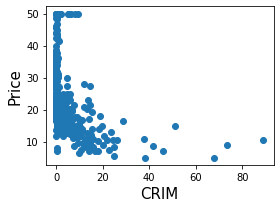

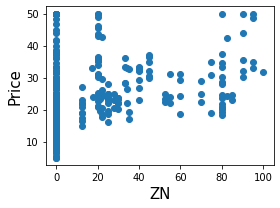

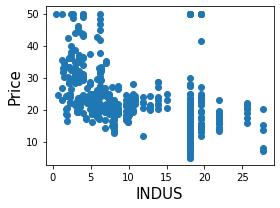

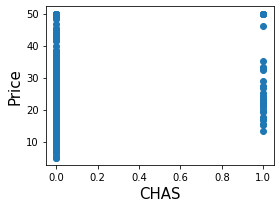

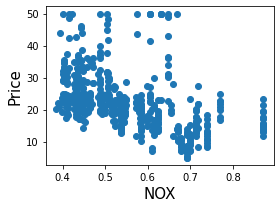

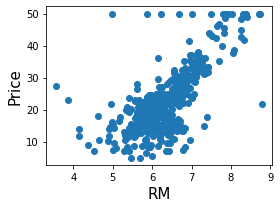

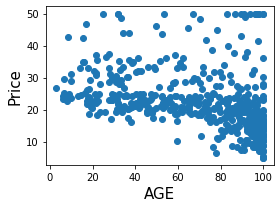

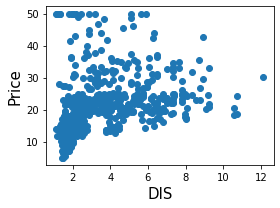

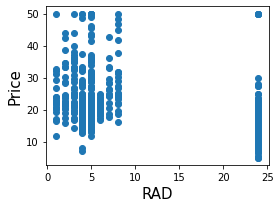

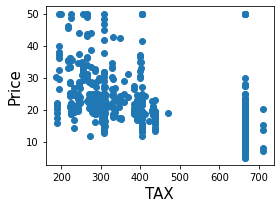

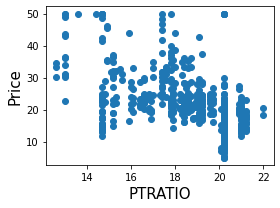

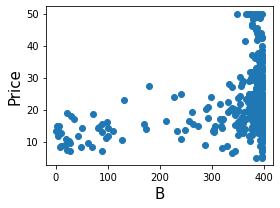

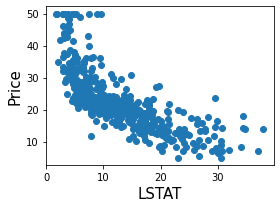

In [253]:
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize = (4,3))
    plt.scatter(boston.data[:, index], boston.target)
    
    plt.ylabel("Price", size = 15)
    plt.xlabel(feature_name, size = 15)
    
    plt.tight_layout()

plt.show()    

In [254]:
price_df = pd.DataFrame(np.array(boston.target), columns = ["price"])

In [255]:
price_df.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [256]:
scaler = StandardScaler()

In [257]:
scaler.fit(feature_df)

StandardScaler()

In [258]:
features_scaled_df = pd.DataFrame(data=scaler.transform(feature_df),
                                 columns=feature_df.columns)

In [259]:
x_train, x_test, y_train, y_test = \
train_test_split(feature_df, price_df, test_size = 0.2, random_state = 101)

In [260]:
type(x_train),type(x_test),type(y_train),type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [261]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [262]:
type(x_train), type(x_test), type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [263]:
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [264]:
y_train.shape, y_test.shape

((404, 1), (102, 1))

In [265]:
reg_model = LinearRegression()

In [266]:
reg_model.fit(x_train, y_train)

LinearRegression()

In [267]:
print("Weight", reg_model.coef_)

Weight [[-9.89913563e-02  4.25047578e-02  1.67390094e-02  3.06437882e+00
  -1.56462528e+01  4.01888422e+00 -8.31558474e-04 -1.44628034e+00
   2.67827281e-01 -1.04725485e-02 -8.88651815e-01  8.25262805e-03
  -5.49367192e-01]]


In [268]:
print("Bias", reg_model.intercept_)

Bias [32.90613091]


In [269]:
predicted = reg_model.predict(x_test)
expected = y_test

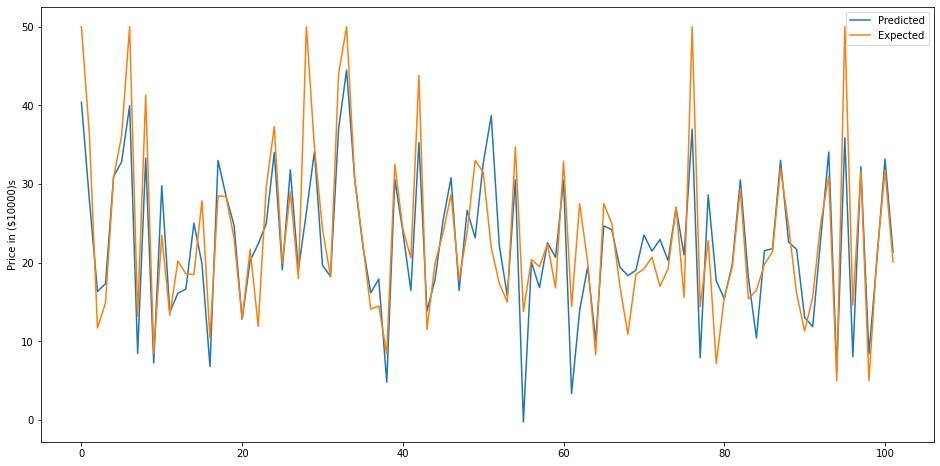

In [270]:
plt.figure(figsize=(16,8))

plt.plot(predicted, label = "Predicted",)
plt.plot(expected, label = "Expected")


plt.ylabel("Price in ($10000)s")
plt.legend()

plt.show()


In [271]:
import tensorflow as tf

In [272]:
tf.compat.v1.disable_eager_execution()
tf.compat.v1.reset_default_graph()

In [273]:
epochs = 3000
learning_rate = 0.001
num_features = x_train.shape[1]
print(num_features)

13


In [274]:
X = tf.compat.v1.placeholder(tf.float32, [None, num_features])
X

<tf.Tensor 'Placeholder:0' shape=(None, 13) dtype=float32>

In [275]:
y = tf.compat.v1.placeholder(tf.float32, [None, 1])
y

<tf.Tensor 'Placeholder_1:0' shape=(None, 1) dtype=float32>

In [276]:
W = tf.Variable(tf.zeros([num_features, 1]), tf.float32)

In [277]:
b = tf.Variable(tf.ones(1), tf.float32)

In [278]:
y_ = tf.matmul(X,W)+ b

In [279]:
cost = tf.reduce_mean(tf.square(y - y_))

In [280]:
cost_hist = tf.compat.v1.summary.histogram("cost", cost)

In [281]:
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

In [282]:
init = tf.compat.v1.global_variables_initializer()

In [283]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    merged_summary = tf.compat.v1.summary.merge_all()
    writer = tf.compat.v1.summary.FileWriter('./linear_regression', sess.graph)
    
    for epoch in range(epochs):
        feed_dictionary = {X:x_train, y:y_train}
        
        result, err = sess.run([optimizer, cost], feed_dict = feed_dictionary)
        
        if epoch%100 == 0:
            print("Epoch:{0}, Error:{1}".format(epoch, err))
    
        print("Epoch:{0}, Error:{1}".format(epoch + 1, err))
    
        summary_result = sess.run(merged_summary, feed_dict = feed_dictionary)
        writer.add_summary(summary_result, epoch)
    
    predicted = sess.run(y_, feed_dict = {X : x_test})
    writer.close()
        

Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
tf.float32 has type DType, but expected one of: int, long, bool
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
tf.float32 has type DType, but expected one of: int, long, bool
Epoch:0, Error:532.47998046875
Epoch:1, Error:532.47998046875
Epoch:2, Error:495.61962890625
Epoch:3, Error:460.5289611816406
Epoch:4, Error:427.2359619140625
Epoch:5, Error:395.76318359375
Epoch:6, Error:366.12786865234375
Epoch:7, Error:338.34100341796875
Epoch:8, Error:312.4064636230469
Epoch:9, Error:288.32080078125
Epoch:10, Error:266.072509765625
Epoch:11, Error:245.64141845703125
Epoch:12, Error:226.99847412109375
Epoch:13, Error:210.10508728027344
Epoch:14, Error:194.91319274902344
Epoch:15, Error:181.36502075195312
Epoch:16, Error:169.3931121826172
Epoch:17, Error:158.92089843

Epoch:229, Error:62.750511169433594
Epoch:230, Error:62.72818374633789
Epoch:231, Error:62.705963134765625
Epoch:232, Error:62.6838264465332
Epoch:233, Error:62.66179656982422
Epoch:234, Error:62.63984298706055
Epoch:235, Error:62.617977142333984
Epoch:236, Error:62.5961799621582
Epoch:237, Error:62.5744743347168
Epoch:238, Error:62.552825927734375
Epoch:239, Error:62.5312614440918
Epoch:240, Error:62.50975036621094
Epoch:241, Error:62.48830032348633
Epoch:242, Error:62.4669075012207
Epoch:243, Error:62.44557189941406
Epoch:244, Error:62.42428207397461
Epoch:245, Error:62.40304946899414
Epoch:246, Error:62.381858825683594
Epoch:247, Error:62.3607177734375
Epoch:248, Error:62.3396110534668
Epoch:249, Error:62.318546295166016
Epoch:250, Error:62.297523498535156
Epoch:251, Error:62.27653121948242
Epoch:252, Error:62.25557327270508
Epoch:253, Error:62.23464584350586
Epoch:254, Error:62.21375274658203
Epoch:255, Error:62.192874908447266
Epoch:256, Error:62.17203140258789
Epoch:257, Error:62

Epoch:470, Error:57.75652313232422
Epoch:471, Error:57.73600769042969
Epoch:472, Error:57.71549987792969
Epoch:473, Error:57.69499206542969
Epoch:474, Error:57.67449951171875
Epoch:475, Error:57.65400314331055
Epoch:476, Error:57.633514404296875
Epoch:477, Error:57.6130256652832
Epoch:478, Error:57.59254455566406
Epoch:479, Error:57.57207107543945
Epoch:480, Error:57.551597595214844
Epoch:481, Error:57.53113555908203
Epoch:482, Error:57.51066589355469
Epoch:483, Error:57.49021530151367
Epoch:484, Error:57.46976089477539
Epoch:485, Error:57.44931411743164
Epoch:486, Error:57.42887496948242
Epoch:487, Error:57.40843200683594
Epoch:488, Error:57.38800048828125
Epoch:489, Error:57.36757278442383
Epoch:490, Error:57.34715270996094
Epoch:491, Error:57.32673645019531
Epoch:492, Error:57.30632781982422
Epoch:493, Error:57.28591537475586
Epoch:494, Error:57.26551818847656
Epoch:495, Error:57.245121002197266
Epoch:496, Error:57.2247314453125
Epoch:497, Error:57.20435333251953
Epoch:498, Error:57

Epoch:722, Error:52.82737731933594
Epoch:723, Error:52.80909729003906
Epoch:724, Error:52.790828704833984
Epoch:725, Error:52.77256393432617
Epoch:726, Error:52.75432205200195
Epoch:727, Error:52.736087799072266
Epoch:728, Error:52.71786880493164
Epoch:729, Error:52.69965744018555
Epoch:730, Error:52.681461334228516
Epoch:731, Error:52.663272857666016
Epoch:732, Error:52.645103454589844
Epoch:733, Error:52.62693405151367
Epoch:734, Error:52.608795166015625
Epoch:735, Error:52.59065628051758
Epoch:736, Error:52.57252502441406
Epoch:737, Error:52.554412841796875
Epoch:738, Error:52.53631591796875
Epoch:739, Error:52.518226623535156
Epoch:740, Error:52.50015640258789
Epoch:741, Error:52.48208236694336
Epoch:742, Error:52.46403121948242
Epoch:743, Error:52.44599533081055
Epoch:744, Error:52.42796325683594
Epoch:745, Error:52.409950256347656
Epoch:746, Error:52.39193344116211
Epoch:747, Error:52.37395095825195
Epoch:748, Error:52.35597229003906
Epoch:749, Error:52.33800506591797
Epoch:750, 

Epoch:959, Error:48.847171783447266
Epoch:960, Error:48.83192443847656
Epoch:961, Error:48.816680908203125
Epoch:962, Error:48.80145263671875
Epoch:963, Error:48.78622817993164
Epoch:964, Error:48.77103042602539
Epoch:965, Error:48.75584030151367
Epoch:966, Error:48.74066162109375
Epoch:967, Error:48.72549819946289
Epoch:968, Error:48.71034622192383
Epoch:969, Error:48.69520568847656
Epoch:970, Error:48.680084228515625
Epoch:971, Error:48.66497039794922
Epoch:972, Error:48.64986801147461
Epoch:973, Error:48.63478088378906
Epoch:974, Error:48.619712829589844
Epoch:975, Error:48.60464859008789
Epoch:976, Error:48.589595794677734
Epoch:977, Error:48.57456588745117
Epoch:978, Error:48.559539794921875
Epoch:979, Error:48.54453659057617
Epoch:980, Error:48.529537200927734
Epoch:981, Error:48.51455307006836
Epoch:982, Error:48.49958419799805
Epoch:983, Error:48.48462677001953
Epoch:984, Error:48.46967697143555
Epoch:985, Error:48.45474624633789
Epoch:986, Error:48.43982696533203
Epoch:987, Er

Epoch:1202, Error:45.50893020629883
Epoch:1203, Error:45.49665451049805
Epoch:1204, Error:45.4843864440918
Epoch:1205, Error:45.47213363647461
Epoch:1206, Error:45.45988845825195
Epoch:1207, Error:45.44765853881836
Epoch:1208, Error:45.43544006347656
Epoch:1209, Error:45.4232292175293
Epoch:1210, Error:45.41102981567383
Epoch:1211, Error:45.39883804321289
Epoch:1212, Error:45.386661529541016
Epoch:1213, Error:45.3745002746582
Epoch:1214, Error:45.36234664916992
Epoch:1215, Error:45.35020446777344
Epoch:1216, Error:45.338077545166016
Epoch:1217, Error:45.32595443725586
Epoch:1218, Error:45.31385040283203
Epoch:1219, Error:45.301753997802734
Epoch:1220, Error:45.28966522216797
Epoch:1221, Error:45.277591705322266
Epoch:1222, Error:45.26551818847656
Epoch:1223, Error:45.25347137451172
Epoch:1224, Error:45.241432189941406
Epoch:1225, Error:45.22940444946289
Epoch:1226, Error:45.217376708984375
Epoch:1227, Error:45.205379486083984
Epoch:1228, Error:45.19337463378906
Epoch:1229, Error:45.181

Epoch:1450, Error:42.78459167480469
Epoch:1451, Error:42.7747917175293
Epoch:1452, Error:42.7650146484375
Epoch:1453, Error:42.7552490234375
Epoch:1454, Error:42.7454833984375
Epoch:1455, Error:42.7357292175293
Epoch:1456, Error:42.72597885131836
Epoch:1457, Error:42.71623611450195
Epoch:1458, Error:42.70650863647461
Epoch:1459, Error:42.6967887878418
Epoch:1460, Error:42.68708038330078
Epoch:1461, Error:42.677371978759766
Epoch:1462, Error:42.66767883300781
Epoch:1463, Error:42.657997131347656
Epoch:1464, Error:42.6483154296875
Epoch:1465, Error:42.638648986816406
Epoch:1466, Error:42.62899398803711
Epoch:1467, Error:42.61933898925781
Epoch:1468, Error:42.60969543457031
Epoch:1469, Error:42.60006332397461
Epoch:1470, Error:42.59043502807617
Epoch:1471, Error:42.580814361572266
Epoch:1472, Error:42.57120132446289
Epoch:1473, Error:42.56159973144531
Epoch:1474, Error:42.55200958251953
Epoch:1475, Error:42.54242706298828
Epoch:1476, Error:42.53285598754883
Epoch:1477, Error:42.5232810974

Epoch:1710, Error:40.50373458862305
Epoch:1711, Error:40.495880126953125
Epoch:1712, Error:40.48802947998047
Epoch:1713, Error:40.48018264770508
Epoch:1714, Error:40.47234344482422
Epoch:1715, Error:40.46451187133789
Epoch:1716, Error:40.45669174194336
Epoch:1717, Error:40.44886779785156
Epoch:1718, Error:40.44105911254883
Epoch:1719, Error:40.43324661254883
Epoch:1720, Error:40.42544937133789
Epoch:1721, Error:40.41765594482422
Epoch:1722, Error:40.40987014770508
Epoch:1723, Error:40.40208435058594
Epoch:1724, Error:40.394309997558594
Epoch:1725, Error:40.38653564453125
Epoch:1726, Error:40.37877655029297
Epoch:1727, Error:40.37101745605469
Epoch:1728, Error:40.36326599121094
Epoch:1729, Error:40.35551834106445
Epoch:1730, Error:40.3477783203125
Epoch:1731, Error:40.34004592895508
Epoch:1732, Error:40.33232498168945
Epoch:1733, Error:40.3245964050293
Epoch:1734, Error:40.3168830871582
Epoch:1735, Error:40.30916976928711
Epoch:1736, Error:40.30147171020508
Epoch:1737, Error:40.29376983

Epoch:1964, Error:38.68638229370117
Epoch:1965, Error:38.67985534667969
Epoch:1966, Error:38.67333221435547
Epoch:1967, Error:38.666812896728516
Epoch:1968, Error:38.66029739379883
Epoch:1969, Error:38.653785705566406
Epoch:1970, Error:38.647274017333984
Epoch:1971, Error:38.640769958496094
Epoch:1972, Error:38.634273529052734
Epoch:1973, Error:38.627784729003906
Epoch:1974, Error:38.62128829956055
Epoch:1975, Error:38.614803314208984
Epoch:1976, Error:38.60832595825195
Epoch:1977, Error:38.601844787597656
Epoch:1978, Error:38.595375061035156
Epoch:1979, Error:38.588905334472656
Epoch:1980, Error:38.58243942260742
Epoch:1981, Error:38.57597732543945
Epoch:1982, Error:38.569522857666016
Epoch:1983, Error:38.563072204589844
Epoch:1984, Error:38.55662536621094
Epoch:1985, Error:38.55017852783203
Epoch:1986, Error:38.543739318847656
Epoch:1987, Error:38.53730773925781
Epoch:1988, Error:38.53087615966797
Epoch:1989, Error:38.52444839477539
Epoch:1990, Error:38.51802444458008
Epoch:1991, Err

Epoch:2212, Error:37.184913635253906
Epoch:2213, Error:37.17927932739258
Epoch:2214, Error:37.173648834228516
Epoch:2215, Error:37.168025970458984
Epoch:2216, Error:37.16240692138672
Epoch:2217, Error:37.15678787231445
Epoch:2218, Error:37.15116882324219
Epoch:2219, Error:37.14555358886719
Epoch:2220, Error:37.13994216918945
Epoch:2221, Error:37.13433074951172
Epoch:2222, Error:37.12873077392578
Epoch:2223, Error:37.123130798339844
Epoch:2224, Error:37.117530822753906
Epoch:2225, Error:37.11193084716797
Epoch:2226, Error:37.10633850097656
Epoch:2227, Error:37.10074996948242
Epoch:2228, Error:37.09516143798828
Epoch:2229, Error:37.089576721191406
Epoch:2230, Error:37.0839958190918
Epoch:2231, Error:37.07841873168945
Epoch:2232, Error:37.072845458984375
Epoch:2233, Error:37.06727600097656
Epoch:2234, Error:37.061702728271484
Epoch:2235, Error:37.05613708496094
Epoch:2236, Error:37.05057144165039
Epoch:2237, Error:37.04500961303711
Epoch:2238, Error:37.03944778442383
Epoch:2239, Error:37.

Epoch:2470, Error:35.81928634643555
Epoch:2471, Error:35.814292907714844
Epoch:2472, Error:35.809303283691406
Epoch:2473, Error:35.80431365966797
Epoch:2474, Error:35.799320220947266
Epoch:2475, Error:35.79433822631836
Epoch:2476, Error:35.78935241699219
Epoch:2477, Error:35.784366607666016
Epoch:2478, Error:35.77939224243164
Epoch:2479, Error:35.774410247802734
Epoch:2480, Error:35.76943588256836
Epoch:2481, Error:35.76446533203125
Epoch:2482, Error:35.759490966796875
Epoch:2483, Error:35.7545166015625
Epoch:2484, Error:35.74955368041992
Epoch:2485, Error:35.744590759277344
Epoch:2486, Error:35.7396240234375
Epoch:2487, Error:35.73466110229492
Epoch:2488, Error:35.72970199584961
Epoch:2489, Error:35.7247428894043
Epoch:2490, Error:35.719783782958984
Epoch:2491, Error:35.7148323059082
Epoch:2492, Error:35.709877014160156
Epoch:2493, Error:35.70492935180664
Epoch:2494, Error:35.699981689453125
Epoch:2495, Error:35.69503402709961
Epoch:2496, Error:35.69009017944336
Epoch:2497, Error:35.6

Epoch:2724, Error:34.608009338378906
Epoch:2725, Error:34.60344314575195
Epoch:2726, Error:34.598873138427734
Epoch:2727, Error:34.59430694580078
Epoch:2728, Error:34.58974075317383
Epoch:2729, Error:34.585174560546875
Epoch:2730, Error:34.58061981201172
Epoch:2731, Error:34.57605743408203
Epoch:2732, Error:34.57149124145508
Epoch:2733, Error:34.566932678222656
Epoch:2734, Error:34.5623779296875
Epoch:2735, Error:34.557823181152344
Epoch:2736, Error:34.55327224731445
Epoch:2737, Error:34.5487174987793
Epoch:2738, Error:34.544166564941406
Epoch:2739, Error:34.53961181640625
Epoch:2740, Error:34.535064697265625
Epoch:2741, Error:34.530517578125
Epoch:2742, Error:34.525970458984375
Epoch:2743, Error:34.521427154541016
Epoch:2744, Error:34.51688003540039
Epoch:2745, Error:34.5123405456543
Epoch:2746, Error:34.5078010559082
Epoch:2747, Error:34.50326156616211
Epoch:2748, Error:34.498722076416016
Epoch:2749, Error:34.49418258666992
Epoch:2750, Error:34.489646911621094
Epoch:2751, Error:34.48

Epoch:2967, Error:33.533546447753906
Epoch:2968, Error:33.529258728027344
Epoch:2969, Error:33.52497100830078
Epoch:2970, Error:33.52068328857422
Epoch:2971, Error:33.516395568847656
Epoch:2972, Error:33.51211166381836
Epoch:2973, Error:33.50782775878906
Epoch:2974, Error:33.5035400390625
Epoch:2975, Error:33.49925994873047
Epoch:2976, Error:33.4949836730957
Epoch:2977, Error:33.49069595336914
Epoch:2978, Error:33.486419677734375
Epoch:2979, Error:33.482139587402344
Epoch:2980, Error:33.47786331176758
Epoch:2981, Error:33.47359085083008
Epoch:2982, Error:33.46931838989258
Epoch:2983, Error:33.46503829956055
Epoch:2984, Error:33.46076202392578
Epoch:2985, Error:33.45648956298828
Epoch:2986, Error:33.45221710205078
Epoch:2987, Error:33.44794845581055
Epoch:2988, Error:33.44367218017578
Epoch:2989, Error:33.43940734863281
Epoch:2990, Error:33.435142517089844
Epoch:2991, Error:33.430877685546875
Epoch:2992, Error:33.426605224609375
Epoch:2993, Error:33.42233657836914
Epoch:2994, Error:33.4

In [284]:
predicted.shape

(102, 1)

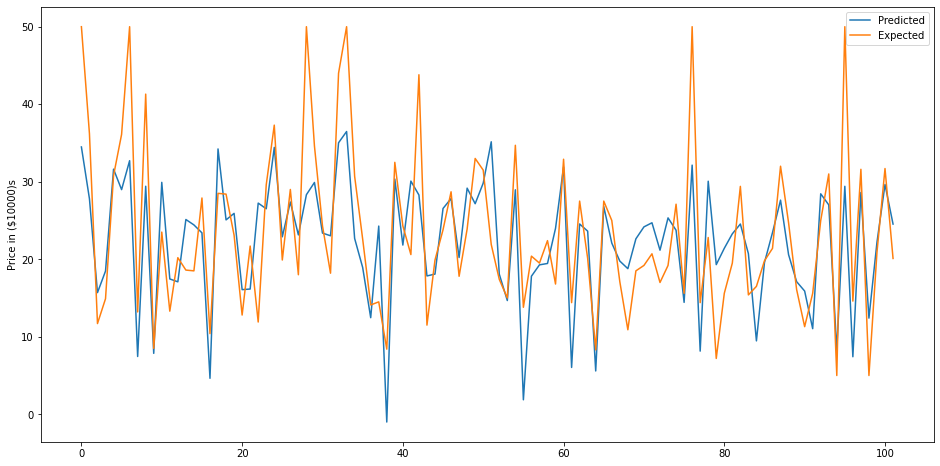

In [285]:
plt.figure(figsize=(16,8))

plt.plot(predicted, label = "Predicted",)
plt.plot(expected, label = "Expected")


plt.ylabel("Price in ($10000)s")
plt.legend()

plt.show()